[1]  2 37

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-116.7990  -15.2280    2.6775   -0.6501   16.3910   76.0370 

[1] 34.41049

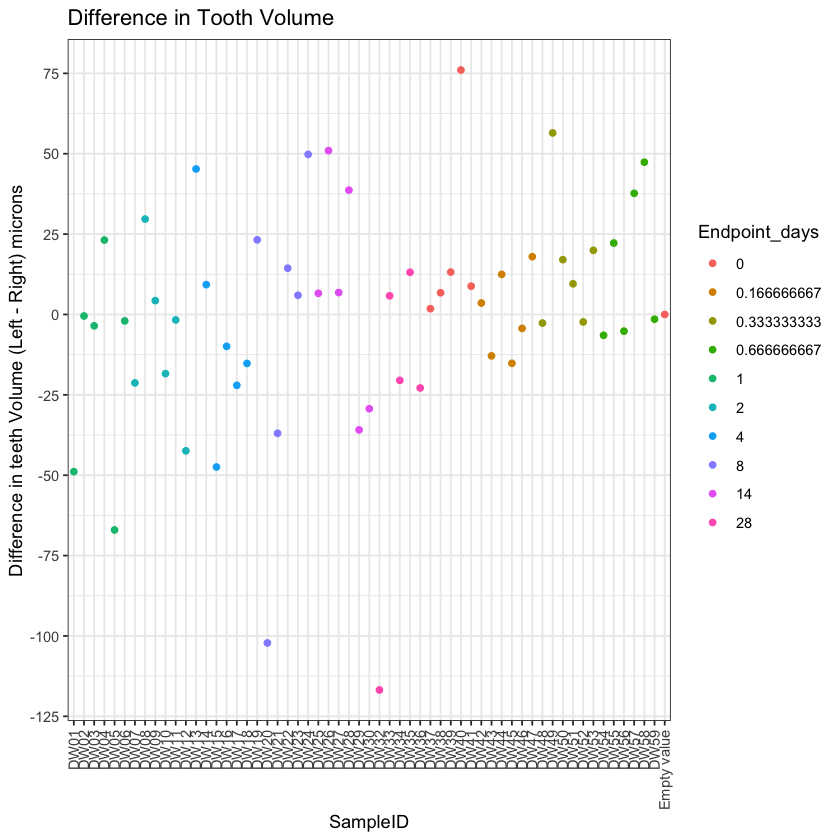

In [41]:
library("ggplot2")
library("dplyr")
library("scales")

#defined samples to include
sample_names_df = c("DW01","DW02","DW03","DW04","DW05","DW06","DW07","DW08","DW09","DW10",
                    "DW11","DW12","DW13","DW14","DW15","DW16","DW17","DW18","DW19","DW20",
                    "DW21","DW22","DW23","DW24","DW25","DW26","DW27","DW28","DW29","DW30",
                           "DW32","DW33","DW34","DW35","DW36","DW37","DW38","DW39","DW40",
                    "DW41","DW42","DW43","DW44","DW45","DW46","DW47","DW48","DW49","DW50",
                    "DW51","DW52","DW53","DW54","DW55","DW56","DW57","DW58","DW59")
# sample_names_df = c(       "DW02","DW03","DW04","DW05","DW06","DW07","DW08","DW09","DW10",
#                     "DW11","DW12","DW13","DW14","DW15","DW16","DW17","DW18","DW19","DW20",
#                     "DW21","DW22","DW23","DW24","DW25","DW26","DW27","DW28","DW29","DW30",
#                            "DW32","DW33","DW34","DW35","DW36")

default_table_names = c("Segment","Voxel count (LM)", "Volume mm3 (LM)", "Volume cm3 (LM)", "Voxel count (SV)", "Volume mm3 (SV)","Volume cm3 (SV)","Minimum", "Maximum", "Mean", "Standard deviation",
                        "Percentile 5", "Percentile 95", "Median", "Surface mm2", "Volume mm3 (CS)", "Volume cm3 (CS)")

#read in the samples details
sample_info_df = read.csv("uCT scan records.csv")
#sample_info_df
sampleID_df = data.frame(sample_info_df$Sample.name..scanco.)
colnames(sampleID_df) = "SampleID"
sampleID_duration_df = data.frame(factor(sample_info_df$exp_endpoint..days.))
colnames(sampleID_duration_df) = "Endpoint_days"
sampleID_and_duration_df = data.frame(cbind(sampleID_df, sampleID_duration_df))
#sampleID_and_duration_df

#try reading in a sample
current_sample_Left = read.table(file = "DW02/DW02_L.tsv", header = TRUE, fill = TRUE)
#current_sample_Left
dim(current_sample_Left)
colnames(current_sample_Left) = default_table_names
#current_sample_Left
current_sample_Left = current_sample_Left[1:2,1:17]
#current_sample_Left

#make a dataframe for all tooth statistics
num_samples = length(sample_names_df)
all_tooth_samples_df = data.frame(matrix(data = 0, nrow = num_samples, ncol = 19))
data_names = c("SampleID","Orientation side","Segment", "Voxel count (LM)","Volume mm3 (LM)" , "Volume cm3 (LM)", "Voxel count (SV)","Volume mm3 (SV)","Volume cm3 (SV)",
                          "Orientation side","Segment", "Voxel count (LM)","Volume mm3 (LM)" , "Volume cm3 (LM)", "Voxel count (SV)","Volume mm3 (SV)","Volume cm3 (SV)", 
               "Difference_in_volume", "Total_volume")
#data_names
colnames(all_tooth_samples_df) = data_names
#all_tooth_samples_df

for(i in 1:num_samples){
  #read in the left side table
  current_sample_name = sample_names_df[i]
  left_table_file = current_sample_name
  left_table_file = paste0(left_table_file, "/")
  left_table_file = paste0(left_table_file, current_sample_name)
  left_table_file = paste0(left_table_file,"_L.tsv")
  #print(left_table_file)
  current_sample_Left_df = read.table(file = left_table_file, header = TRUE, fill = TRUE)
  colnames(current_sample_Left_df) = default_table_names
  current_sample_Left_df = current_sample_Left_df[1:2,1:11]
  #current_sample_Left_df
  
  # #read in the right side table
  right_table_file = current_sample_name
  right_table_file = paste0(right_table_file, "/")
  right_table_file = paste0(right_table_file, current_sample_name)
  right_table_file = paste0(right_table_file,"_R.tsv")
  #print(right_table_file)
  current_sample_Right_df = read.table(file = right_table_file, header = TRUE, fill = TRUE)

  # #gather the results for the left side
  all_tooth_samples_df[i, 1] = sample_names_df[i]
  all_tooth_samples_df[i, 2] = "Left"
  all_tooth_samples_df[i, 3:9] = current_sample_Left_df[1, 1:7]

  all_tooth_samples_df[i, 10] = "Right"
  all_tooth_samples_df[i, 11:17] = current_sample_Right_df[1, 1:7]
  all_tooth_samples_df[i, 18] = all_tooth_samples_df[i, 6] - all_tooth_samples_df[i, 14]
  all_tooth_samples_df[i, 19] = all_tooth_samples_df[i, 6] + all_tooth_samples_df[i, 14]
  
}
#all_tooth_samples_df

#gather only the sampleID and the differences
tooth_sample_IDS = all_tooth_samples_df$SampleID
#tooth_sample_IDS
tooth_differences = as.numeric(all_tooth_samples_df$Difference_in_volume)
#tooth_differences
sampleID_ligand_duration = data.frame(sample_info_df$Sample.name..scanco.)
tooth_data_to_plot = data.frame(cbind(tooth_sample_IDS,tooth_differences))
colnames(tooth_data_to_plot) = cbind("SampleID","Difference_in_volume")
#tooth_data_to_plot
#add the sampleID ligand duration
tooth_data_to_plot2 = merge(tooth_data_to_plot, sampleID_and_duration_df, by = "SampleID", all.x = TRUE)
tooth_data_to_plot2$Endpoint_days = as.character(tooth_data_to_plot2$Endpoint_days)
#tooth_data_to_plot2

#add the value 0
zero_value = data.frame(matrix(data = 0, nrow = 1, ncol = 3))
colnames(zero_value) = cbind("SampleID","Difference_in_volume", "Endpoint_days")
zero_value[1,1] = "Empty value"
tooth_data_to_plot2 = rbind(tooth_data_to_plot2,zero_value)
#move the scale from cm to microns, multiply by 1,000,000
tooth_data_to_plot3 = tooth_data_to_plot2
tooth_data_to_plot3$Difference_in_volume = as.numeric(tooth_data_to_plot3$Difference_in_volume) * 1000000
tooth_data_to_plot3$Endpoint_days = factor(tooth_data_to_plot3$Endpoint_days, 
                                            levels = c("0", "0.166666667", "0.333333333", "0.666666667", "1", "2", "4", "8", "14", "28"))

scatter_of_tooth_differences = ggplot(data = tooth_data_to_plot3, aes(x = SampleID, y = Difference_in_volume, color = Endpoint_days)) + 
                               geom_point() + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
                               ylab("Difference in teeth Volume (Left - Right) microns") + 
                               scale_y_continuous(breaks = seq(-300, 300, by = 25)) + ggtitle("Difference in Tooth Volume")
print(scatter_of_tooth_differences)

summary(as.numeric(tooth_data_to_plot3[1:num_samples, 2]))
sd(tooth_data_to_plot3[1:num_samples, 2])


In [42]:
#plot the total volume of the teeth
tooth_volume = as.numeric(all_tooth_samples_df$Total_volume)
tooth_volume_to_plot = data.frame(cbind(tooth_sample_IDS, tooth_volume))
colnames(tooth_volume_to_plot) = cbind("SampleID","Total_volume")
#tooth_volume_to_plot

tooth_volume_to_plot2 = merge(tooth_volume_to_plot, sampleID_and_duration_df, by = "SampleID", all.x = TRUE)
tooth_volume_to_plot2$Endpoint_days = as.character(tooth_volume_to_plot2$Endpoint_days)
#tooth_volume_to_plot2

#add the value 0
# zero_sample_val = data.frame(matrix(data = 0, nrow = 1, ncol = 3))
# colnames(zero_sample_val) = c("SampleID", "Total_volume", "Endpoint_days")
# zero_sample_val[1,1] = "Empty_value"
# tooth_volume_to_plot2 = rbind(tooth_volume_to_plot2, zero_sample_val)
tooth_volume_to_plot2$Total_volume = as.numeric(tooth_volume_to_plot2$Total_volume)
#order the endpoint days variable

tooth_volume_to_plot3 = tooth_volume_to_plot2
tooth_volume_to_plot3$Total_volume = tooth_volume_to_plot3$Total_volume*1000000
tooth_volume_to_plot3$Endpoint_days = factor(tooth_volume_to_plot3$Endpoint_days, 
                                             levels = c("0", "0.166666667", "0.333333333", "0.666666667", "1", "2", "4", "8", "14", "28"))
#order the total tooth volume
tooth_volume_to_plot3 = tooth_volume_to_plot3[order(tooth_volume_to_plot3$Total_volume), ]

tooth_volume_to_plot3 <- tooth_volume_to_plot3[order(tooth_volume_to_plot3$Endpoint_days, tooth_volume_to_plot3$Total_volume), ]

# Set SampleID as a factor in that order:
tooth_volume_to_plot3$SampleID <- factor(tooth_volume_to_plot3$SampleID, levels = tooth_volume_to_plot3$SampleID)
print(tooth_volume_to_plot3)

   SampleID Total_volume Endpoint_days
40     DW41     1567.660             0
38     DW39     1626.576             0
39     DW40     1666.339             0
37     DW38     1671.089             0
36     DW37     1785.879             0
45     DW46     1408.307   0.166666667
46     DW47     1463.549   0.166666667
44     DW45     1558.916   0.166666667
42     DW43     1670.094   0.166666667
41     DW42     1675.662   0.166666667
43     DW44     1723.230   0.166666667
48     DW49     1525.022   0.333333333
50     DW51     1570.802   0.333333333
51     DW52     1578.787   0.333333333
52     DW53     1598.075   0.333333333
49     DW50     1718.102   0.333333333
47     DW48     1761.693   0.333333333
58     DW59     1452.144   0.666666667
57     DW58     1511.729   0.666666667
56     DW57     1600.010   0.666666667
53     DW54     1666.460   0.666666667
54     DW55     1735.880   0.666666667
55     DW56     1771.493   0.666666667
2      DW02     1530.273             1
1      DW01     1651.569 

agg_record_1631601042 
                    2

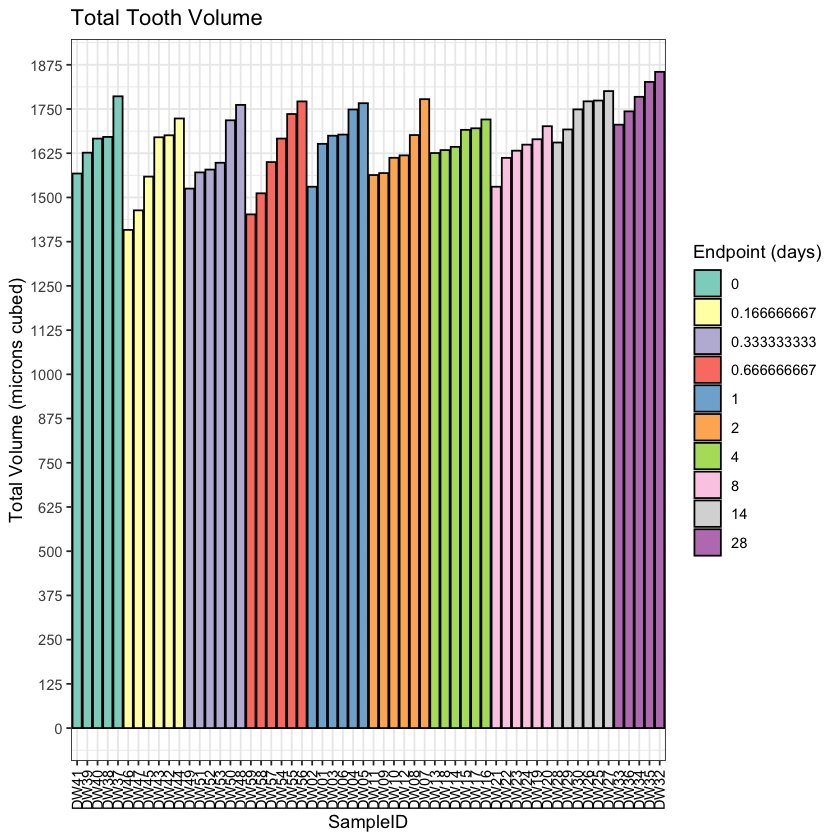

In [43]:
bargraph_of_teeth_volume = ggplot(data = tooth_volume_to_plot3, aes(x = SampleID, y = Total_volume, fill = Endpoint_days)) + 
                           geom_bar(stat = "identity", color = "black") + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
                           scale_y_continuous(breaks = seq(0, 2000, by = 125)) +
                           ylab("Total Volume (microns cubed)") + ggtitle("Total Tooth Volume") + theme(axis.text.x = element_text(color = "black")) +
                           labs(fill = "Endpoint (days)") + scale_fill_brewer(palette = "Set3")
print(bargraph_of_teeth_volume)  

# Step 1: Call the pdf command to start the plot
pdf(file = "Total_tooth_volume.pdf",   # The directory you want to save the file in
    width = 12, # The width of the plot in inches
    height = 12) # The height of the plot in inches
# Step 2: Create the plot with R code
print(bargraph_of_teeth_volume)
# Step 3: Run dev.off() to create the file!
dev.off()



In [44]:

print(summary(as.numeric(tooth_volume_to_plot3$Total_volume)))
print(sd(tooth_volume_to_plot3$Total_volume))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1408    1603    1668    1661    1733    1855 
[1] 96.07753


In [45]:
#one way anova
# Compute the analysis of variance
res.aov <- aov(Total_volume ~ Endpoint_days, data = tooth_volume_to_plot3)
# Summary of the analysis
summary(res.aov)

              Df Sum Sq Mean Sq F value Pr(>F)  
Endpoint_days  9 175202   19467   2.662 0.0137 *
Residuals     48 350959    7312                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

agg_record_1151032780 
                    2

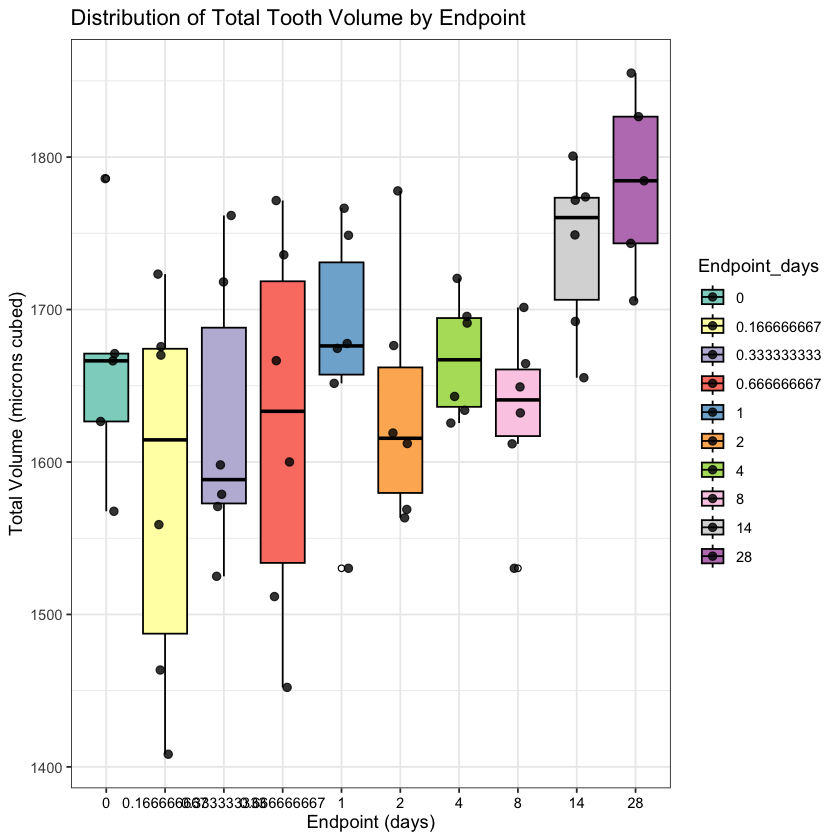

In [47]:
#box and whisker plot
tooth_box_and_whisker_plot = ggplot(data = tooth_volume_to_plot3, aes(x = Endpoint_days, y = Total_volume, fill = Endpoint_days)) +
                       geom_boxplot(color = "black", outlier.shape = 21, outlier.fill = "white") +
                       theme_bw() +
                       ylab("Total Volume (microns cubed)") +
                       xlab("Endpoint (days)") +
                       ggtitle("Distribution of Total Tooth Volume by Endpoint") +
                       scale_fill_brewer(palette = "Set3") +
                       theme(
                        axis.text.x = element_text(color = "black"))+
                       geom_jitter(width = 0.15, size = 2, alpha = 0.8)
print(tooth_box_and_whisker_plot)

# Step 1: Call the pdf command to start the plot
pdf(file = "Total_tooth_volume_boxplots.pdf",   # The directory you want to save the file in
    width = 12, # The width of the plot in inches
    height = 12) # The height of the plot in inches
# Step 2: Create the plot with R code
print(tooth_box_and_whisker_plot)
# Step 3: Run dev.off() to create the file!
dev.off()

In [48]:
group_0_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "0"))
print(paste0("Group 0 mean: ", mean(group_0_mean$Total_volume)))

group_1667_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "0.166666667"))
print(paste0("Group 0.16666667 mean: ", mean(group_1667_mean$Total_volume)))

group_3333_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "0.333333333"))
print(paste0("Group 0.333333333 mean: ", mean(group_3333_mean$Total_volume)))

group_6666_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "0.666666667"))
print(paste0("Group 0.666666667 mean: ", mean(group_6666_mean$Total_volume)))

group_1_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "1"))
print(paste0("Group 1 mean: ", mean(group_1_mean$Total_volume)))

group_2_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "2"))
print(paste0("Group 2 mean: ", mean(group_2_mean$Total_volume)))

group_4_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "4"))
print(paste0("Group 4 mean: ", mean(group_4_mean$Total_volume)))

group_8_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "8"))
print(paste0("Group 8 mean: ", mean(group_8_mean$Total_volume)))

group_14_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "14"))
print(paste0("Group 14 mean: ", mean(group_14_mean$Total_volume)))

group_28_mean = data.frame(filter(tooth_volume_to_plot3, tooth_volume_to_plot3$Endpoint_days == "28"))
print(paste0("Group 28 mean: ", mean(group_28_mean$Total_volume)))

[1] "Group 0 mean: 1663.5086"
[1] "Group 0.16666667 mean: 1583.293"
[1] "Group 0.333333333 mean: 1625.4135"
[1] "Group 0.666666667 mean: 1622.95266666667"
[1] "Group 1 mean: 1674.86883333333"
[1] "Group 2 mean: 1636.25683333333"
[1] "Group 4 mean: 1668.24833333333"
[1] "Group 8 mean: 1631.583"
[1] "Group 14 mean: 1740.43716666667"
[1] "Group 28 mean: 1783.0332"
